# graph2vecを利用して変数名の提案

In [772]:
def sim_combine(sim_list):
  result = {}
  result_count ={}
  for i in range(len(sim_list)):
    try:
      if sim_list[i][0] in result[sim_list[i][0]].keys(): #判断result里是否建立有simlist的key
        continue
    except KeyError:
      result[sim_list[i][0]] = {}
      result_count[sim_list[i][0]] = {}
    temp = sim_list[i]
    sum = 0
    count = 0
    if temp[1] not in result[temp[0]].keys():
      for j in range(i,len(sim_list)):     
        if temp[1] == sim_list[j][1] and temp[0] == sim_list[j][0]:
          sum = sum + sim_list[j][2]
          count += 1
    else:
      continue    
    avg = sum/count
    result[sim_list[i][0]].update({sim_list[i][1] : avg})
    result_count[sim_list[i][0]].update({sim_list[i][1] : count})

    
  return result, result_count

ライブラリーと変数の宣言

In [773]:
from Mygraph2vec import Graph2Vec
import networkx as nx
from ast_draw import CodeTransformer, counter
import glob
import ast
import node_to_vec as n2v

In [774]:
var, for_var, func_var, func_params, func_return = {}, {}, {}, {}, {}
dict_func, var_counter = {},{}
node_to_id = {}
id_to_node = {}
node_to_id, id_to_node = n2v.create_node_lib()      #create node corpus
var_to_id, func_to_id = {},{}
id_to_var, id_to_func = {},{}

テストファイルの入力

In [775]:
path = '/Users/wintor7/report7/test_file/'
file = glob.glob(path + '*_search_words_*.py')
func = 'search_words'
file

['/Users/wintor7/report7/test_file/e205760_search_words_sub_set.py',
 '/Users/wintor7/report7/test_file/e215701_search_words_intermediate_result.py',
 '/Users/wintor7/report7/test_file/e205715_search_words_searched.py',
 '/Users/wintor7/report7/test_file/e195760_search_words_search_word.py',
 '/Users/wintor7/report7/test_file/e195743_search_words_one_youso_list.py',
 '/Users/wintor7/report7/test_file/e215710_search_words_words_dict.py',
 '/Users/wintor7/report7/test_file/e205708_search_words_save_files.py',
 '/Users/wintor7/report7/test_file/e195735_search_words_result.py',
 '/Users/wintor7/report7/test_file/e215703_search_words_count.py',
 '/Users/wintor7/report7/test_file/e195730_search_words_file_list.py',
 '/Users/wintor7/report7/test_file/e195763_search_words_result_files.py',
 '/Users/wintor7/report7/test_file/e205728_search_words_items_.py',
 '/Users/wintor7/report7/test_file/e215716_search_words_count.py',
 '/Users/wintor7/report7/test_file/e205717_search_words_words.py',
 '/Us

In [776]:
file[-3]

'/Users/wintor7/report7/test_file/e205717_search_words_words.py'

ASTの抽出

In [777]:
test_var = 'test_var1'
with open(file[-3], 'r') as fh:
  content = fh.read()

In [778]:
r_node = ast.parse(content)

transformer = CodeTransformer()
r_node = transformer.visit(r_node)

transformer.name_line



{'make_index': {'index': [17, 27, 28],
  'sentence': [18, 21, 22, 24, 25],
  'filenames': [19, 26],
  'fh': [20, 21],
  'names': [23, 26, 27]},
 'search_words': {'test_var': [57, 59, 60, 61],
  'index': [57, 59],
  'test_var1': [57, 58]}}

In [779]:
dict_func = counter(dict_func, transformer.var_in_func)

name_line = transformer.name_line
node_list = {}

for key in name_line.keys():
  var_node = {}
  for var, value in name_line[key].items():
    for i in value:
      transformer.track_line(r_node, i)
      if var not in var_node.keys():
        var_node[var] = [transformer.target_var]
      elif transformer.target_var not in var_node[var]:
        var_node[var].append(transformer.target_var)
  node_list[key] = var_node
node_list


{'make_index': {'index': [<_ast.Assign at 0x1722da8b0>,
  'sentence': [<_ast.Assign at 0x1698037f0>,
  'filenames': [<_ast.For at 0x1722d62e0>, <_ast.Expr at 0x1695bf4f0>],
  'fh': [<_ast.With at 0x169588460>, <_ast.Expr at 0x177591af0>],
  'names': [<_ast.Assign at 0x169921c70>,
   <_ast.Assign at 0x1695bfb20>]},
 'search_words': {'test_var': [<_ast.Assign at 0x169591520>,
  'index': [<_ast.Assign at 0x169591520>, <_ast.Assign at 0x169591ca0>],
  'test_var1': [<_ast.Assign at 0x169591520>, <_ast.For at 0x169591280>]}}

In [780]:
loop_list = {}        #
for key in name_line.keys():
  loop_temp_list = {}
  for var, value in name_line[key].items():
    for i in value:
      transformer.track_loop(r_node,i)
      if var not in loop_temp_list.keys():
        loop_temp_list[var] = [transformer.target_loop]
      elif transformer.target_loop not in loop_temp_list[var]:
        loop_temp_list[var].append(transformer.target_loop)
  loop_list[key] = loop_temp_list 
loop_list

{'make_index': {'index': [None, <_ast.For at 0x169907280>],
  'sentence': [<_ast.For at 0x169907280>, <_ast.For at 0x1722d62e0>],
  'filenames': [<_ast.For at 0x1722d62e0>, <_ast.For at 0x169907280>],
  'fh': [<_ast.For at 0x1722d62e0>],
  'names': [<_ast.For at 0x169907280>]},
 'search_words': {'test_var': [<_ast.Try at 0x169591100>],
  'index': [<_ast.Try at 0x169591100>],
  'test_var1': [<_ast.Try at 0x169591100>]}}

In [781]:
def_list = {}      #
for key in name_line.keys():
  def_temp_list = {}
  for var, value in name_line[key].items():
    for i in value:
      transformer.track_def(r_node,i)
      if var not in def_temp_list.keys():
        def_temp_list[var] = [transformer.target_def]
      elif transformer.target_def not in def_temp_list[var]:
        def_temp_list[var].append(transformer.target_def)
  def_list[key] = def_temp_list
def_list

{'make_index': {'index': [<_ast.FunctionDef at 0x169c84a30>],
  'sentence': [<_ast.FunctionDef at 0x169c84a30>],
  'filenames': [<_ast.FunctionDef at 0x169c84a30>],
  'fh': [<_ast.FunctionDef at 0x169c84a30>],
  'names': [<_ast.FunctionDef at 0x169c84a30>]},
 'search_words': {'test_var': [<_ast.FunctionDef at 0x16958e3d0>],
  'index': [<_ast.FunctionDef at 0x16958e3d0>],
  'test_var1': [<_ast.FunctionDef at 0x16958e3d0>]}}

In [782]:
func_list = list(transformer.var_in_func.keys())
var_list = []
for i,v in enumerate(transformer.var_in_func):
  for i in transformer.var_in_func[v]:
    var_list.append(i)
var_to_id, id_to_var = n2v.name_corpus(var_list, var_to_id, id_to_var)
func_to_id, id_to_func = n2v.name_corpus(func_list, func_to_id, id_to_func)

In [783]:
graphs = []
graph = nx.DiGraph()
str_to_node = {}
for var_node in node_list[func][test_var]:
  root = len(str_to_node)
  n2v.create_graph(var_node, node_to_id, graph, str_to_node, root)
  for node in graph.nodes():
    graph.nodes[node]['feature'] = str_to_node[node]
  root += 1  
graphs.append(graph) 

In [784]:
graphs_loop = []
graph = nx.DiGraph()
str_to_node = {}
for var_node in loop_list[func][test_var]:
  if var_node == None:
    continue
  root = len(str_to_node)
  n2v.create_graph(var_node, node_to_id, graph, str_to_node, root)
  for node in graph.nodes():
    graph.nodes[node]['feature'] = str_to_node[node]
  root += 1  
graphs_loop.append(graph) 

In [785]:
graphs_def = []
graph = nx.DiGraph()
str_to_node = {}
for var_node in def_list[func][test_var]:
  root = len(str_to_node)
  n2v.create_graph(var_node, node_to_id, graph, str_to_node, root)
  for node in graph.nodes():
    graph.nodes[node]['feature'] = str_to_node[node]
  root += 1  
graphs_def.append(graph) 

グラフの形を展示する

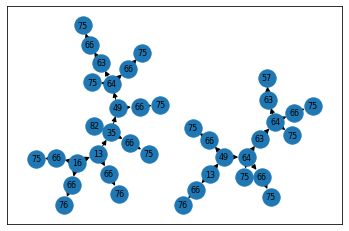

In [786]:
import matplotlib.pyplot as plt

pos = nx.nx_pydot.pydot_layout(graphs[0])
nx.write_gpickle(graphs[0],'graphset/test.gpickle')
node_labels = nx.get_node_attributes(graphs[0], 'feature')
nx.draw_networkx(graphs[0],pos=pos, arrows= True, with_labels = True, font_size=8, labels = node_labels)
plt.show()

ASTをモデルに入力する

In [787]:
model = Graph2Vec(attributed= True)


In [788]:
from MyWeisfeilerLehaman import WeisfeilerLehmanHashing
from gensim.models.doc2vec import TaggedDocument
import random
import numpy as np

documents = [
  WeisfeilerLehmanHashing(
      graph, 2, True, False)
  for graph in graphs
]


documents_loop = [
  WeisfeilerLehmanHashing(
      graph, 2, True, False)
  for graph in graphs_loop
]


documents_def = [
  WeisfeilerLehmanHashing(
      graph, 2, True, False)
  for graph in graphs_def
]


In [790]:
documents = [
  doc.get_graph_features() for i, doc in enumerate(documents)
]

documents_loop = [
  doc.get_graph_features() for i, doc in enumerate(documents_loop)
]

documents_def = [
  doc.get_graph_features() for i, doc in enumerate(documents_def)
]

In [791]:
documents[0].append('for')
for j in range(len(documents_loop[0])):
  documents[0].append(documents_loop[0][j])
#documents[0].append(documents_def[0])

In [794]:
test = model.infer_vector(documents[0],pkg_path="/Users/wintor7/Research/model/new_model.model")

G2Vにより提案結果

In [795]:
sim = model.most_similar(test, topn=20, clip_start=8980,pkg_path="/Users/wintor7/Research/model/new_model.model")

sim

[('9221', "['search_words', 'keywords_for_search']", 0.9782716035842896),
 ('9443', "['search_words', 'keywords_for_search']", 0.9750876426696777),
 ('9904', "['search_words', 'keywords_for_search']", 0.973802924156189),
 ('9701', "['search_words', 'keywords_for_search']", 0.9715607166290283),
 ('9236', "['search_words', 'names']", 0.9690793752670288),
 ('9532', "['search_words', 'keywords_for_search']", 0.9684762358665466),
 ('8989', "['search_words', 'names']", 0.9680792689323425),
 ('9070', "['search_words', 'names']", 0.968051016330719),
 ('9040', "['search_words', 'names']", 0.9675125479698181),
 ('9001', "['search_words', 'keywords_for_search']", 0.9669075012207031),
 ('9523', "['search_words', 'names']", 0.9658015966415405),
 ('9334', "['search_words', 'names']", 0.9620233774185181),
 ('9078', "['search_words', 'words']", 0.7635605931282043),
 ('9588', "['search_words', 'word_list']", 0.7622934579849243),
 ('9612', "['search_words', 'keywords_for_search']", 0.7618195414543152),


In [801]:
test_list, test_count = sim_combine(sim)
result_list, result_count = sim_combine(sim)

In [802]:
result_list

{'search_words': {'keywords_for_search': 0.9422751665115356,
  'names': 0.9667578637599945,
  'words': 0.7200226709246635,
  'word_list': 0.7093089818954468,
  'search': 0.7081510312855244,
  'result': 0.700105521414015,
  'keywords': 0.6994399875402451,
  'search_word': 0.692883163690567,
  'count': 0.7021528035402298,
  'index': 0.686926907963223,
  'for_file': 0.6976155894143241,
  'filename': 0.6812416315078735,
  'filenames': 0.6862005194028219,
  'search_list': 0.6856781244277954,
  'word': 0.6803025901317596,
  'file_list': 0.6775985062122345,
  'x': 0.6753873527050018,
  'file': 0.6732934713363647},
 'make_index': {'file1': 0.6976555287837982}}

In [803]:
result_count

{'search_words': {'keywords_for_search': 7,
  'names': 6,
  'words': 8,
  'word_list': 7,
  'search': 16,
  'result': 9,
  'keywords': 4,
  'search_word': 2,
  'count': 8,
  'index': 9,
  'for_file': 7,
  'filename': 4,
  'filenames': 3,
  'search_list': 1,
  'word': 2,
  'file_list': 2,
  'x': 2,
  'file': 1},
 'make_index': {'file1': 2}}

課題文とのマッチング

In [805]:
import get_alternateName as ga

マッチングにより提案結果

In [806]:
all_list = ga.get_altName(result_list[func])
all_list

['element', 'minified', 'parse_equals', 'toto', 'zeroTrimmed']

In [807]:
len(all_list)

5